In [1]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# for building and training neural networks
import tensorflow as tf
import matplotlib.pyplot as plt

# custom functions
import utils

# reduce display precision on numpy arrays
#np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [2]:
# Load the dataset from the text file
data = np.loadtxt('./110data.txt', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (104, 1)
the shape of the targets y is: (104, 1)


In [3]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (62, 1)
the shape of the training set (target) is: (62, 1)

the shape of the cross validation set (input) is: (21, 1)
the shape of the cross validation set (target) is: (21, 1)

the shape of the test set (input) is: (21, 1)
the shape of the test set (target) is: (21, 1)


Minimum value of the training set: 1.00
Maximum value of the training set: 103.00
Scaling factor of the training set: 0.01


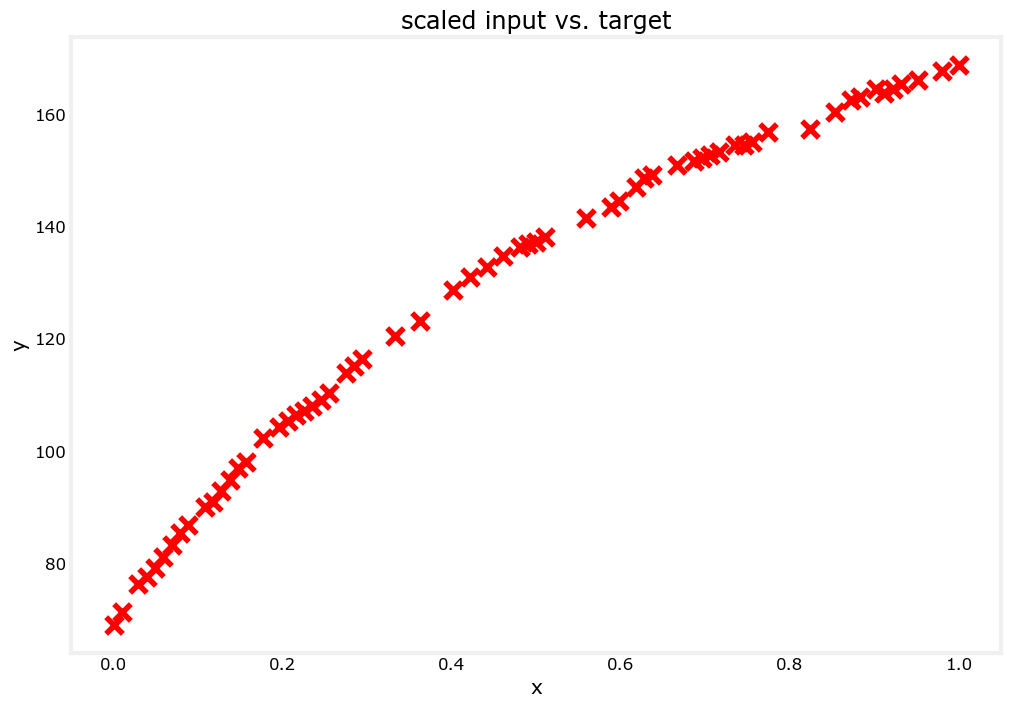

In [4]:
# Initialize the class
#scaler_linear = StandardScaler()
scaler_linear = MinMaxScaler()

# Compute the mean and standard deviation of the training set then transform it
#x_train = x
X_train_scaled = scaler_linear.fit_transform(x_train)

#print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Corrected code: MinMaxScaler doesn't have squeeze() method
# Instead, we can access data_min_ and data_range_ attributes
print(f"Minimum value of the training set: {scaler_linear.data_min_.squeeze():.2f}")
print(f"Maximum value of the training set: {scaler_linear.data_max_.squeeze():.2f}")
print(f"Scaling factor of the training set: {scaler_linear.scale_.squeeze():.2f}")

#y_train = y
# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

In [5]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 16.361724148123788
training MSE (for-loop implementation): 16.361724148123784


In [7]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

#print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Corrected code: MinMaxScaler doesn't have squeeze() method
# Instead, we can access data_min_ and data_range_ attributes
print(f"Minimum value of the training set: {scaler_linear.data_min_.squeeze():.2f}")
print(f"Maximum value of the training set: {scaler_linear.data_max_.squeeze():.2f}")
print(f"Scaling factor of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Minimum value of the training set: 1.00
Maximum value of the training set: 103.00
Scaling factor of the training set: 0.01
Cross validation MSE: 19.256833650496915


In [8]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

# Forecast next 6 points
pred_point = 6
data_points = 104
future_x = np.arange(data_points, data_points + pred_point).reshape(-1, 1)  # Predict points 103 to 110
future_x_poly = poly.transform(future_x)

future_x_plot = np.arange(len(future_x))

[[  78. 6084.]
 [  24.  576.]
 [  35. 1225.]
 [  91. 8281.]
 [  71. 5041.]]


In [9]:
# Instantiate the class
#scaler_poly = StandardScaler()
scaler_poly = MinMaxScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[0.75490196 0.57343514]
 [0.2254902  0.05420437]
 [0.33333333 0.11538462]
 [0.88235294 0.78054299]
 [0.68627451 0.47511312]]


In [10]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train)

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 0.7923870313236874
Cross validation MSE: 0.8852804462536441


For degree: 1, lowest CV MSE=19.2568 and Training MSE=16.3617

Future Predictions: 
[[179.8089011 ]
 [180.7529755 ]
 [181.6970499 ]
 [182.64112429]
 [183.58519869]
 [184.52927309]]
For degree: 2, lowest CV MSE=0.8853 and Training MSE=0.7924

Future Predictions: 
[[166.31001354]
 [166.48721608]
 [166.65028943]
 [166.79923361]
 [166.93404861]
 [167.05473443]]
For degree: 3, lowest CV MSE=0.2131 and Training MSE=0.2215

Future Predictions: 
[[169.33000619]
 [169.85308254]
 [170.37835216]
 [170.90612012]
 [171.43669147]
 [171.97037129]]
For degree: 4, lowest CV MSE=0.2221 and Training MSE=0.2194

Future Predictions: 
[[169.10196027]
 [169.58164114]
 [170.05987052]
 [170.5367966 ]
 [171.01256466]
 [171.48731714]]
For degree: 5, lowest CV MSE=0.2110 and Training MSE=0.1987

Future Predictions: 
[[169.91514217]
 [170.62371261]
 [171.36089045]
 [172.12906875]
 [172.9307312 ]
 [173.76845386]]
For degree: 6, lowest CV MSE=0.2183 and Training MSE=0.1889

Future Predictions: 
[[169.38440594]
 [169

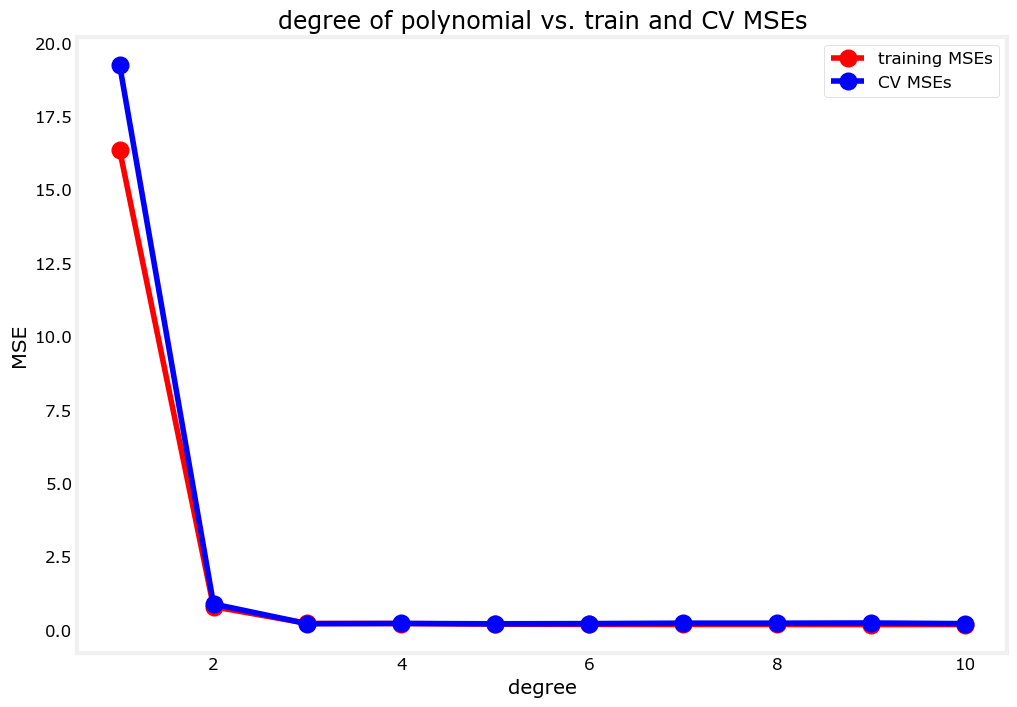

In [11]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []
regr_future_predict = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    #scaler_poly = StandardScaler()
    scaler_poly = MinMaxScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Forecast points - First apply polynomial transformation, then scale
    future_x_poly = poly.transform(future_x)                     # Apply polynomial transformation first
    future_x_poly_scaled = scaler_poly.transform(future_x_poly)  # Then scale
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    print(f"For degree: {degree}, lowest CV MSE={cv_mse:.4f} and Training MSE={train_mse:.4f}")

    # Record the future predictions 
    yhat = model.predict(future_x_poly_scaled)
    regr_future_predict.append(yhat)
    print(f"\nFuture Predictions:",
          f"\n{regr_future_predict[degree-1]}")
    
# Plot the results
degrees=range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [12]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE={cv_mse} is found in the model with degree={degree}")

Lowest CV MSE=0.2164050226684083 is found in the model with degree=5


In [13]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 0.20
Cross Validation MSE: 0.21
Test MSE: 0.35


Training MSE: 0.20
Cross Validation MSE: 0.21
Test MSE: 0.23
Metrics fit:
	MSE: 0.231575
	R²: 0.999406
Forecasted Values: 
[[169.91514217]
 [170.62371261]
 [171.36089045]
 [172.12906875]
 [172.9307312 ]
 [173.76845386]]


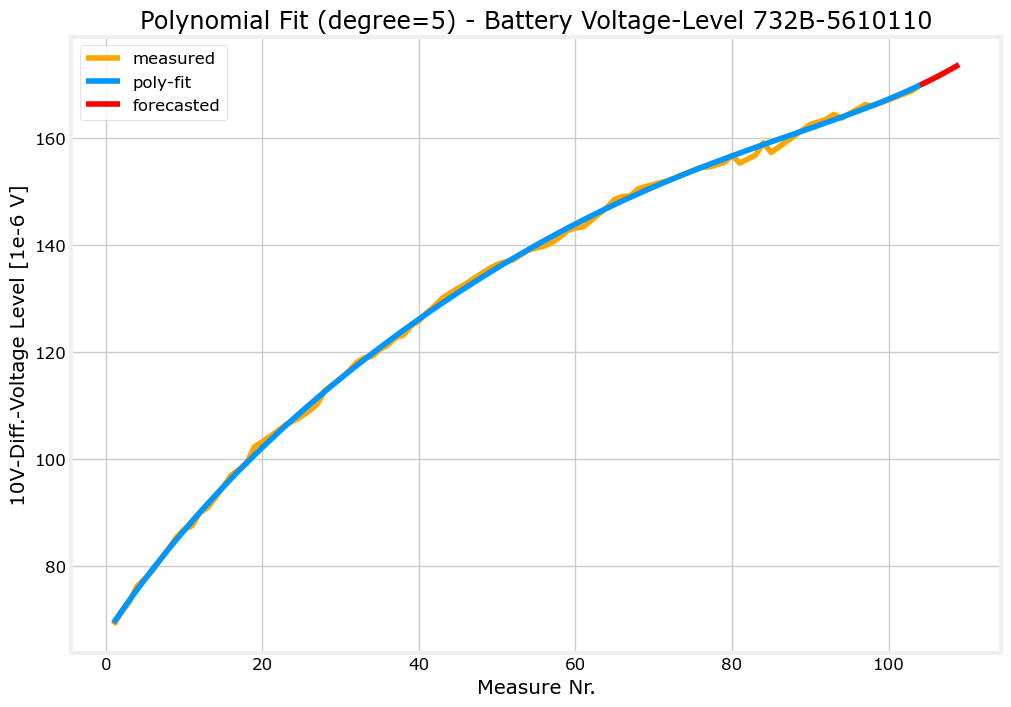

In [14]:
# Add polynomial features to the test set
#X_test_mapped = polys[degree-1].transform(x_test)
X_mapped = polys[degree-1].transform(x)

# Scale the test set
#X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)
X_mapped_scaled = scalers[degree-1].transform(X_mapped)

# Compute the test MSE
#yhat = models[degree-1].predict(X_test_mapped_scaled)
#test_mse = mean_squared_error(y_test, yhat) / 2
yhat_poly = models[degree-1].predict(X_mapped_scaled)
test_mse = mean_squared_error(y, yhat_poly) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

print(f"Metrics fit:\n\tMSE: {mean_squared_error(y, yhat_poly) / 2:.6f}\n\tR²: {r2_score(y, yhat_poly):.6f}")

print(f"Forecasted Values:",
      f"\n{regr_future_predict[degree-1]}")

#plt.scatter(x_test, yhat, color='blue', label='model-valued')
plt.plot(x, y, color='orange', label='measured')
plt.plot(x, yhat_poly, alpha=1.0, label='poly-fit')
plt.plot(future_x_plot+data_points, regr_future_predict[degree-1], color='red', label='forecasted')
plt.title(f"Polynomial Fit (degree={degree}) - Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")
plt.legend()
plt.grid()
plt.show()

In [15]:
print(yhat_poly)

[[ 69.37182216]
 [ 71.48556176]
 [ 73.54515403]
 [ 75.55284878]
 [ 77.51080968]
 [ 79.42111596]
 [ 81.28576415]
 [ 83.10666979]
 [ 84.88566911]
 [ 86.6245208 ]
 [ 88.3249077 ]
 [ 89.98843852]
 [ 91.61664954]
 [ 93.21100638]
 [ 94.77290563]
 [ 96.30367665]
 [ 97.80458323]
 [ 99.27682535]
 [100.72154085]
 [102.13980719]
 [103.53264313]
 [104.90101048]
 [106.24581579]
 [107.56791208]
 [108.86810054]
 [110.14713228]
 [111.40571001]
 [112.64448977]
 [113.86408266]
 [115.06505654]
 [116.24793775]
 [117.41321282]
 [118.5613302 ]
 [119.69270197]
 [120.80770556]
 [121.90668545]
 [122.98995493]
 [124.05779774]
 [125.11046987]
 [126.14820121]
 [127.17119733]
 [128.17964112]
 [129.17369458]
 [130.15350048]
 [131.11918413]
 [132.07085503]
 [133.00860865]
 [133.93252811]
 [134.84268591]
 [135.73914564]
 [136.6219637 ]
 [137.491191  ]
 [138.34687472]
 [139.18905998]
 [140.01779157]
 [140.83311568]
 [141.63508162]
 [142.42374348]
 [143.19916195]
 [143.96140592]
 [144.71055429]
 [145.44669763]
 [146.16